# WeRateDogs Project- Wrangling & Analyzing Twitter Data¶
By Mint

## Gathering data

In [1247]:
import pandas as pd
import requests
import tweepy
import json
import numpy as np
from matplotlib import pyplot as plt

### Gathering data; web scraping

    '''python
    url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
    response = requests.get(url)
    with open('image_predictions.tsv', 'wb') as file:
        file.write(response.content)
    '''

In [1248]:
#use read_csv to read tsv file
image_predic = pd.read_csv('image_predictions.tsv', sep = '\t')

配置api，官方提供的网站内部数据的下载接口。

In [1249]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

### code for download data from API

    '''python
    tweet_ids = twitter_archive.tweet_id
    tweet_json = []
    for tweet_id in tweet_ids:
        try:
            status = api.get_status(tweet_id, tweet_mode='extended', 
                                    wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
            json_file = json.dumps(status._json)
            tweet_json.append(json_file)
        except :
            print(tweet_id,'deleted')
    '''

In [1250]:
json_data = pd.read_json('tweet_json.txt')

change json_data into tweet ID, retweet count, and favorite count dataframe

In [1251]:
info = ['id', 'retweet_count', 'favorite_count']

In [1252]:
tweet_data = pd.DataFrame(columns=info)

In [1253]:
index = 0
for one_line_json in json_data[0]:
    info_data = json.loads(one_line_json)
    info_data = [info_data[key] for key in info]
    tweet_data = tweet_data.append(pd.DataFrame(dict(zip(info, info_data)), index=[index]))
    index = index + 1

# Assess Data

In [1254]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [1255]:
twitter_archive.rating_denominator.describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [1256]:
twitter_archive.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [1257]:
twitter_archive.rating_denominator.describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [1258]:
twitter_archive.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [1259]:
image_predic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [1260]:
image_predic.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
779,689905486972461056,https://pbs.twimg.com/media/CZMJYCRVAAE35Wk.jpg,4,Pomeranian,0.943331,True,Shetland_sheepdog,0.023675,True,chow,0.007165,True
1155,733109485275860992,https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg,1,golden_retriever,0.945523,True,Labrador_retriever,0.042319,True,doormat,0.003956,False
454,674764817387900928,https://pbs.twimg.com/media/CV0_BSuWIAIvE9k.jpg,2,Samoyed,0.634695,True,Arctic_fox,0.309853,False,kuvasz,0.019641,True
1294,751830394383790080,https://pbs.twimg.com/media/Cm8JwBqW8AAFOEn.jpg,1,chow,0.703569,True,Pomeranian,0.076637,True,Siamese_cat,0.045959,False
368,672968025906282496,https://pbs.twimg.com/media/CVbc2V2WsAE3-kn.jpg,1,toy_poodle,0.678046,True,miniature_poodle,0.160273,True,Airedale,0.065649,True


In [1261]:
image_predic.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [1262]:
image_predic[image_predic.p1_dog == False][image_predic.p2_dog == False][image_predic.p3_dog == False].sample()

/Users/Super/anaconda/envs/wrangle/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
361,672828477930868736,https://pbs.twimg.com/media/CVZd7ttWcAEs2wP.jpg,1,sandbar,0.118154,False,stingray,0.075915,False,seashore,0.075125,False


In [1263]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2345 entries, 0 to 2344
Data columns (total 3 columns):
favorite_count    2345 non-null object
id                2345 non-null object
retweet_count     2345 non-null object
dtypes: object(3)
memory usage: 73.3+ KB


In [1264]:
twitter_archive_clean.rating_denominator.value_counts()

10.0    1351
Name: rating_denominator, dtype: int64

## twitter_archive
### Quality
1. twitter_archive表格中in_reply_to_status_id和in_reply_to_user_id，retweeted_status_id，retweeted_status_user_id和retweeted_status_timestamp有缺失值.
2. twitter_archive表格中tweet_id是整数格式，应该改成字符串格式。
3. 对于twitter_archive表格中rating_denominator，狗狗评分的分母都应该是10
4. twitter_archive表格中timestamp是字符串格式,应该改为时间格式。
5. retweet转发数据,181个retweet的数据需要清理.
7. in reply回复数据是无用的，会随时间变化
8. name里面存在不合理值, 需要参考text的值重新提取.
9. numerator存在不合理的值.
10. 只需要含有原始图片的评级, 有retweet的说明不是原始的, 通过合并含有图片的列表解决.
11. 分子, 分母需要转换成浮点型

### Tideness
1. 把变量名作为了列名，应该用stage作为列名，doggo，floofer，pupper，puppo是不同状态.
2. 三个表格有重合部分可以合并。
3. 删除不需要的数据列, 增加可读性

## image_predic
### Quality
1. tweet id应该是字符串

## tweet_data
### Quality
1. 把id转换为tweet_id.

# Clean data

In [1265]:
# make a duplication of original dataset
twitter_archive_clean = twitter_archive.copy()

image_predic_clean = image_predic.copy()

tweet_data_clean = tweet_data.copy()

## Issue 1
## Define
删除retweet和reply的数据, 保留原始数据,然后删去twitter_archive表格中in_reply_to_status_id和in_reply_to_user_id，retweeted_status_id，retweeted_status_user_id和retweeted_status_timestamp

## Code

In [1266]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]

In [1267]:
twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

## Test

In [1268]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


## Define
和image_predic对比, 保留含有图片的tweet.
### Code

In [1269]:
image_predic_clean.tweet_id = image_predic_clean.tweet_id.apply(str)
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.apply(str)

twitter_archive_clean = twitter_archive_clean.merge(image_predic_clean, how='inner')

### test

In [1270]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 23 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null object
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
doggo                 1994 non-null object
floofer               1994 non-null object
pupper                1994 non-null object
puppo                 1994 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null ob

## Issue 3
## Define
twitter_archive表格中timestamp是字符串格式,应该改为时间格式。

In [1271]:
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

## Test

In [1272]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 23 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null datetime64[ns]
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
doggo                 1994 non-null object
floofer               1994 non-null object
pupper                1994 non-null object
puppo                 1994 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non

## Issue 4
## Define
对于twitter_archive表格中rating_denominator，狗狗评分的分母都应该是10，对于分母不是10的数据认为是不符合规定, 通过逐条text得到正确的评分.

## Code

In [1273]:
twitter_archive_clean.loc[:,['rating_denominator', 'rating_numerator']].mean()

rating_denominator    10.532096
rating_numerator      12.280843
dtype: float64

In [1274]:
def correct_numerator_denominator(data, index, numerator, denominator=10):
    data.loc[index, 'rating_numerator'] = numerator
    data.loc[index, 'rating_denominator'] = denominator
    return None

In [1275]:
twitter_archive_clean[twitter_archive_clean.rating_denominator != 10]['text']

323     The floofs have been released I repeat the flo...
385     Meet Sam. She smiles 24/7 &amp; secretly aspir...
662     Why does this never happen at my front door......
800     After so many requests, this is Bretagne. She ...
848     Say hello to this unbelievably well behaved sq...
891     Happy 4/20 from the squad! 13/10 for all https...
925     This is Bluebert. He just saw that both #Final...
946     Happy Saturday here's 9 puppers on a bench. 99...
970     Here's a brigade of puppers. All look very pre...
988     From left to right:\nCletus, Jerome, Alejandro...
1054    Here is a whole flock of puppers.  60/50 I'll ...
1130    Happy Wednesday here's a bucket of pups. 44/40...
1302    Two sneaky puppers were not initially seen, mo...
1303    Someone help the girl is being mugged. Several...
1328    This is Darrel. He just robbed a 7/11 and is i...
1435    IT'S PUPPERGEDDON. Total of 144/120 ...I think...
1494    Here we have an entire platoon of puppers. Tot...
1973    This i

In [1276]:
correct_numerator_denominator(twitter_archive_clean, 323, 12, 10)
correct_numerator_denominator(twitter_archive_clean, 385, 12, 10)
correct_numerator_denominator(twitter_archive_clean, 662, 11, 10)
correct_numerator_denominator(twitter_archive_clean, 800, 14, 10)
correct_numerator_denominator(twitter_archive_clean, 848, 12, 10)
correct_numerator_denominator(twitter_archive_clean, 891, 13, 10)
correct_numerator_denominator(twitter_archive_clean, 925, 11, 10)
correct_numerator_denominator(twitter_archive_clean, 946, 11, 10)
correct_numerator_denominator(twitter_archive_clean, 970, 10, 10)
correct_numerator_denominator(twitter_archive_clean, 988, 9, 10)
correct_numerator_denominator(twitter_archive_clean, 1054, 12, 10)
correct_numerator_denominator(twitter_archive_clean, 1130, 11, 10)
correct_numerator_denominator(twitter_archive_clean, 1302, 11, 10)
correct_numerator_denominator(twitter_archive_clean, 1303, 11, 10)
correct_numerator_denominator(twitter_archive_clean, 1328, 10, 10)
correct_numerator_denominator(twitter_archive_clean, 1435, 12, 10)
correct_numerator_denominator(twitter_archive_clean, 1494, 11, 10)
correct_numerator_denominator(twitter_archive_clean, 1973, 9, 10)

## Test

In [1277]:
twitter_archive_clean.rating_denominator.value_counts()

10    1994
Name: rating_denominator, dtype: int64

## Define
通过正则查看所有text中含有多组评分的数据, 根据含义更正他们的值.

## code

In [1278]:
import re

pat = r"[0-9]+/[0-9]+"
repl = lambda m: m.group(0)[::-1]
indexes = twitter_archive_clean.loc[twitter_archive_clean.text.str.findall(pat=pat, flags=0).apply(lambda x: len(x) > 1)]

lasevalue = indexes.text.str.findall(pat).apply(lambda x: x[-1].split('/')[0])

secondvalue = twitter_archive_clean.loc[indexes.index, 'rating_numerator']

compare_different_donominator = pd.concat([lasevalue, secondvalue], axis=1)

more_tan_two_scores = compare_different_donominator[compare_different_donominator.text.apply(float) != compare_different_donominator.rating_numerator]

In [1279]:
more_tan_two_scores.index

Int64Index([ 555,  749,  941, 1062, 1152, 1157, 1192, 1207, 1218, 1450, 1484,
            1546, 1550, 1615, 1655, 1708, 1757, 1820, 1857, 1902, 1911],
           dtype='int64')

对于每一个拥有多组评分的图片, 打开图片链接, 对照text更正分子.

In [1280]:
correct_numerator_denominator(twitter_archive_clean, 555, 11.5)
correct_numerator_denominator(twitter_archive_clean, 749, 17/2)
correct_numerator_denominator(twitter_archive_clean, 941, 9)
correct_numerator_denominator(twitter_archive_clean, 1062, 9)
correct_numerator_denominator(twitter_archive_clean, 1152, 13)
correct_numerator_denominator(twitter_archive_clean, 1192, 10)
correct_numerator_denominator(twitter_archive_clean, 1207, 8)
correct_numerator_denominator(twitter_archive_clean, 1218, 10.5)
correct_numerator_denominator(twitter_archive_clean, 1550, 8)
correct_numerator_denominator(twitter_archive_clean, 1708, 8)
correct_numerator_denominator(twitter_archive_clean, 1757, 19/2)
correct_numerator_denominator(twitter_archive_clean, 1820, 17/2)

## Test

In [1281]:
twitter_archive_clean.rating_numerator.value_counts()

12.0      454
10.0      418
11.0      400
13.0      263
9.0       153
8.0        98
7.0        51
14.0       36
6.0        32
5.0        31
3.0        19
4.0        14
2.0         9
1.0         4
8.5         2
0.0         2
10.5        1
9.5         1
75.0        1
27.0        1
11.5        1
1776.0      1
26.0        1
420.0       1
Name: rating_numerator, dtype: int64

## Issue 5
## Define
twitter_archive表格中对狗狗打分的分子的记录是有错误的，其中9.75被记录为了75，11.26被记录为了26，11.27被记录为了27，需要进行改正。

In [1282]:
twitter_archive_clean.rating_numerator.value_counts()

12.0      454
10.0      418
11.0      400
13.0      263
9.0       153
8.0        98
7.0        51
14.0       36
6.0        32
5.0        31
3.0        19
4.0        14
2.0         9
1.0         4
8.5         2
0.0         2
10.5        1
9.5         1
75.0        1
27.0        1
11.5        1
1776.0      1
26.0        1
420.0       1
Name: rating_numerator, dtype: int64

In [1283]:
twitter_archive_clean[twitter_archive_clean.rating_numerator>17]['text']

503     This is Logan, the Chow who lived. He solemnly...
553     This is Sophie. She's a Jubilant Bush Pupper. ...
726     This is Atticus. He's quite simply America af....
1374    Here we have uncovered an entire battalion of ...
1718    After so many requests... here you go.\n\nGood...
Name: text, dtype: object

In [1284]:
twitter_archive_clean.rating_numerator = twitter_archive_clean.rating_numerator.apply(float)

In [1285]:
twitter_archive_clean.rating_denominator = twitter_archive_clean.rating_denominator.apply(float)

In [1286]:
twitter_archive_clean.rating_numerator.replace(to_replace=75, value=9.75, inplace=True)

In [1287]:
twitter_archive_clean.rating_numerator.replace(to_replace=26, value=11.26, inplace=True)

In [1288]:
twitter_archive_clean.rating_numerator.replace(to_replace=27, value=11.27, inplace=True)

## Test

In [1289]:
twitter_archive_clean.rating_numerator.value_counts()

12.00      454
10.00      418
11.00      400
13.00      263
9.00       153
8.00        98
7.00        51
14.00       36
6.00        32
5.00        31
3.00        19
4.00        14
2.00         9
1.00         4
8.50         2
0.00         2
10.50        1
11.26        1
11.27        1
9.75         1
9.50         1
11.50        1
1776.00      1
420.00       1
Name: rating_numerator, dtype: int64

In [1290]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 23 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null datetime64[ns]
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null float64
rating_denominator    1994 non-null float64
name                  1994 non-null object
doggo                 1994 non-null object
floofer               1994 non-null object
pupper                1994 non-null object
puppo                 1994 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994

## Issue 6
## Define
twitter_archive表格中expanded_urls表示了该条Twitter的原始网页，网页上的信息已经被包含在第三个表格tweet_data当中，所以可以删去这一条信息。

## Code

In [1291]:
twitter_archive_clean = twitter_archive_clean.drop(['expanded_urls'],axis = 1)

## Test

In [1292]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 22 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null datetime64[ns]
source                1994 non-null object
text                  1994 non-null object
rating_numerator      1994 non-null float64
rating_denominator    1994 non-null float64
name                  1994 non-null object
doggo                 1994 non-null object
floofer               1994 non-null object
pupper                1994 non-null object
puppo                 1994 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994

## Issue 7·
## Define
在twitter_archive表格中，rating_numerator是浮点型，所以为了保持一致性，应该把rating_denominator也改成浮点型。

## Code

In [1293]:
twitter_archive_clean.rating_denominator = twitter_archive_clean.rating_denominator.apply(float)

## Test

In [1294]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 22 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null datetime64[ns]
source                1994 non-null object
text                  1994 non-null object
rating_numerator      1994 non-null float64
rating_denominator    1994 non-null float64
name                  1994 non-null object
doggo                 1994 non-null object
floofer               1994 non-null object
pupper                1994 non-null object
puppo                 1994 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994

## Issue 8
## Define
在twitter_archive表中狗狗名字name信息中有一些是小写字母开头，这些是错误信息, 对照text利用正则表达式找出来正确的名字

In [1295]:
names_array = twitter_archive_clean.name.unique()

In [1296]:
pat = r"^[a-z]+"
small_name = twitter_archive_clean[twitter_archive_clean.name.str.findall(pat).apply(lambda x: len(x) == 1)]

In [1297]:
small_name.name.values

array(['such', 'a', 'quite', 'quite', 'one', 'incredibly', 'a', 'a',
       'very', 'my', 'one', 'not', 'his', 'one', 'a', 'a', 'a', 'an',
       'very', 'a', 'just', 'getting', 'very', 'this', 'unacceptable',
       'all', 'a', 'a', 'infuriating', 'a', 'a', 'a', 'an', 'a', 'a',
       'very', 'getting', 'just', 'a', 'the', 'the', 'actually', 'by',
       'a', 'officially', 'a', 'the', 'the', 'a', 'a', 'a', 'a', 'a',
       'one', 'a', 'a', 'a', 'light', 'just', 'space', 'a', 'the', 'a',
       'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'an', 'a', 'a', 'a', 'a',
       'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'quite', 'a', 'an', 'a',
       'an', 'the', 'the', 'a', 'a', 'an', 'a', 'a', 'a', 'a'],
      dtype=object)

In [1298]:
pat = r"([A-Z][a-z]*)[\s-]([A-Z][a-z]*)" # 寻找名字的方法

twitter_archive_clean[twitter_archive_clean.text.str.findall(pat).apply(lambda x: len(x) > 1) 
                      & twitter_archive_clean.name.isin(small_name.name.values)]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
783,743222593470234624,2016-06-15 23:24:09,"<a href=""http://twitter.com/download/iphone"" r...",This is a very rare Great Alaskan Bush Pupper....,12.0,10.0,a,None,None,pupper,...,1,kuvasz,0.350629,True,soft-coated_wheaten_terrier,0.182782,True,golden_retriever,0.087662,True
849,730924654643314689,2016-05-13 00:56:32,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Pls stop sending non-canine...,9.0,10.0,unacceptable,None,None,None,...,1,polecat,0.185382,False,mink,0.105282,False,Newfoundland,0.086241,True
919,717537687239008257,2016-04-06 02:21:30,"<a href=""http://twitter.com/download/iphone"" r...",People please. This is a Deadly Mediterranean ...,11.0,10.0,a,None,None,None,...,1,golden_retriever,0.779356,True,Labrador_retriever,0.052511,True,kuvasz,0.049811,True
1065,703041949650034688,2016-02-26 02:20:37,"<a href=""http://twitter.com/download/iphone"" r...",This is an East African Chalupa Seal. We only ...,10.0,10.0,an,None,None,None,...,1,hippopotamus,0.581403,False,doormat,0.152445,False,sea_lion,0.026364,False
1833,668955713004314625,2015-11-24 00:54:05,"<a href=""http://twitter.com/download/iphone"" r...",This is a Slovakian Helter Skelter Feta named ...,10.0,10.0,a,None,None,None,...,1,cocker_spaniel,0.367492,True,Lakeland_terrier,0.272621,True,soft-coated_wheaten_terrier,0.067006,True
1876,668171859951755264,2015-11-21 20:59:20,"<a href=""http://twitter.com/download/iphone"" r...",This is a Trans Siberian Kellogg named Alfonso...,7.0,10.0,a,None,None,None,...,1,Chihuahua,0.664834,True,cowboy_boot,0.060343,False,giant_panda,0.059838,False


有6个小写的名字是有可能可以转变为正常大写开头的名字的.

In [1299]:
twitter_archive_clean.loc[849, 'text']

'We only rate dogs. Pls stop sending non-canines like this Bulgarian Eyeless Porch Bear. This is unacceptable... 9/10 https://t.co/2yctWAUZ3Z'

In [1300]:
twitter_archive_clean.drop(twitter_archive_clean.index[849], inplace=True)

In [1301]:
twitter_archive_clean.loc[919, 'text']

'People please. This is a Deadly Mediterranean Plop T-Rex. We only rate dogs. Only send in dogs. Thanks you... 11/10 https://t.co/2ATDsgHD4n'

In [1302]:
twitter_archive_clean.drop(twitter_archive_clean.index[919], inplace=True)

In [1303]:
twitter_archive_clean.loc[1065, 'text']

'This is an East African Chalupa Seal. We only rate dogs. Please only send in dogs. Thank you... 10/10 https://t.co/iHe6liLwWR'

In [1304]:
twitter_archive_clean.loc[1833, 'text']

'This is a Slovakian Helter Skelter Feta named Leroi. Likes to skip on roofs. Good traction. Much balance. 10/10 wow! https://t.co/Dmy2mY2Qj5'

In [1305]:
twitter_archive_clean.loc[1833, 'name'] = 'Leroi'

In [1306]:
twitter_archive_clean.loc[1876, 'text']

'This is a Trans Siberian Kellogg named Alfonso. Huge ass eyeballs. Actually Dobby from Harry Potter. 7/10 https://t.co/XpseHBlAAb'

In [1307]:
twitter_archive_clean.loc[1876, 'name'] = 'Alfonso'

## Define
剩余的是无法找出名字的小写名字替换为'None'
### Code

In [1308]:
twitter_archive_clean.loc[twitter_archive_clean.name.str.islower(), 'name'] = 'None'

## Test

In [1309]:
twitter_archive_clean[twitter_archive_clean.name.str.islower()]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


## Define
替换所有的小狗的None为np.Nan
### Code

In [1310]:
twitter_archive_clean.loc[twitter_archive_clean.name == "None"] = np.NaN

### Test

In [1311]:
twitter_archive_clean.loc[twitter_archive_clean.name == "None"]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


## Issue 9
## Define
在第二个表格image_predic中，tweet_id是整数格式，应该改为字符串格式。

## Code

In [1312]:
image_predic_clean.tweet_id = image_predic.tweet_id.apply(str)

## Test

In [1313]:
image_predic_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


## Issue 10
## Define
第二个表格image_predic中的img_num仅体现了该用户发的照片数量，可以删去这个信息。

## Code

In [1314]:
image_predic_clean = image_predic_clean.drop(['img_num'],axis = 1)

## Test

In [1315]:
image_predic_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 11 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), object(5)
memory usage: 135.8+ KB


## Define
删除掉tweet_id是空的数据
### Code

In [1316]:
twitter_archive_clean.dropna(how='all', inplace=True)

### test

In [1317]:
twitter_archive_clean[twitter_archive_clean.tweet_id.isna()]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [1318]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1351 entries, 0 to 1963
Data columns (total 22 columns):
tweet_id              1351 non-null object
timestamp             1351 non-null datetime64[ns]
source                1351 non-null object
text                  1351 non-null object
rating_numerator      1351 non-null float64
rating_denominator    1351 non-null float64
name                  1351 non-null object
doggo                 1351 non-null object
floofer               1351 non-null object
pupper                1351 non-null object
puppo                 1351 non-null object
jpg_url               1351 non-null object
img_num               1351 non-null float64
p1                    1351 non-null object
p1_conf               1351 non-null float64
p1_dog                1351 non-null float64
p2                    1351 non-null object
p2_conf               1351 non-null float64
p2_dog                1351 non-null float64
p3                    1351 non-null object
p3_conf           

## Issue 11
## Define
在第一个表格twitter_archive中dog stage分成四列给出，可以合并为一列，对于多个种类的返回“multiple"

## Code

In [1319]:
twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [1320]:
def select_dog_stage(oneline):
    dogStage = ['doggo', 'floofer', 'pupper', 'puppo']
    status = set()
    for stage in [oneline[key] for key in dogStage]:
        status.add(stage)
    if len(status) == 1: # 说明是None
        return np.NaN
    else:
        status.remove('None')
        if len(status) == 1:
            return list(status)[0]
        else:
            return "multiple"

In [1321]:
twitter_archive_clean['status'] = twitter_archive_clean.apply(select_dog_stage, axis=1)

In [1322]:
twitter_archive_clean = twitter_archive_clean.drop(['pupper','doggo','puppo','floofer'],axis=1)

## Test

In [1323]:
twitter_archive_clean.status.value_counts()

pupper      117
doggo        36
puppo        15
floofer       5
multiple      4
Name: status, dtype: int64

In [1324]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1351 entries, 0 to 1963
Data columns (total 19 columns):
tweet_id              1351 non-null object
timestamp             1351 non-null datetime64[ns]
source                1351 non-null object
text                  1351 non-null object
rating_numerator      1351 non-null float64
rating_denominator    1351 non-null float64
name                  1351 non-null object
jpg_url               1351 non-null object
img_num               1351 non-null float64
p1                    1351 non-null object
p1_conf               1351 non-null float64
p1_dog                1351 non-null float64
p2                    1351 non-null object
p2_conf               1351 non-null float64
p2_dog                1351 non-null float64
p3                    1351 non-null object
p3_conf               1351 non-null float64
p3_dog                1351 non-null float64
status                177 non-null object
dtypes: datetime64[ns](1), float64(9), object(9)
memory usag

## Issue 12
## Define
在第三个表格tweet_data中，点赞数favorite_count和转发数retweet_count是字符串格式，应该改为整数型。

## Code

In [1325]:
tweet_data_clean.favorite_count = tweet_data_clean.favorite_count.apply(int)

In [1326]:
tweet_data_clean.retweet_count = tweet_data_clean.retweet_count.apply(int)

## Test

In [1327]:
tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2345 entries, 0 to 2344
Data columns (total 3 columns):
favorite_count    2345 non-null int64
id                2345 non-null object
retweet_count     2345 non-null int64
dtypes: int64(2), object(1)
memory usage: 73.3+ KB


## Issue 13
## Define
在表格twee_data中应该将id改为tweet_id，与其他表格保持一致。

In [1328]:
tweet_data_clean = tweet_data_clean.rename(columns={'id':'tweet_id'})

## Test

In [1329]:
tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2345 entries, 0 to 2344
Data columns (total 3 columns):
favorite_count    2345 non-null int64
tweet_id          2345 non-null object
retweet_count     2345 non-null int64
dtypes: int64(2), object(1)
memory usage: 73.3+ KB


## Issue 14
## define
只需要含有图片tweet的原始评级

三个表格都是以tweet_id作为第一列，所以可以将tweet_id作为主键，将三个表格合并为一个表格。

## Code

In [1330]:
tweet_data_clean.tweet_id = tweet_data_clean.tweet_id.apply(str)

In [1331]:
final_data = pd.merge(twitter_archive_clean, tweet_data_clean,on='tweet_id', how='inner')

# Test

In [1332]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1351 entries, 0 to 1350
Data columns (total 21 columns):
tweet_id              1351 non-null object
timestamp             1351 non-null datetime64[ns]
source                1351 non-null object
text                  1351 non-null object
rating_numerator      1351 non-null float64
rating_denominator    1351 non-null float64
name                  1351 non-null object
jpg_url               1351 non-null object
img_num               1351 non-null float64
p1                    1351 non-null object
p1_conf               1351 non-null float64
p1_dog                1351 non-null float64
p2                    1351 non-null object
p2_conf               1351 non-null float64
p2_dog                1351 non-null float64
p3                    1351 non-null object
p3_conf               1351 non-null float64
p3_dog                1351 non-null float64
status                177 non-null object
favorite_count        1351 non-null int64
retweet_count     

In [1333]:
final_data.to_csv('twitter_archive_master.csv')

In [1334]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv', index_col=[0])

# Insights and visualization

In [1335]:
twitter_archive_master.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog,favorite_count,retweet_count
count,1.351000e+03,1351.000000,1351.0,1351.000000,1351.000000,1351.000000,1.351000e+03,1351.000000,1.351000e+03,1351.000000,1351.000000,1351.000000
mean,7.445606e+17,12.005566,10.0,1.209474,0.600890,0.773501,1.338475e-01,0.784604,6.048548e-02,0.755736,9340.515174,2703.578830
std,6.883780e+16,48.065991,0.0,0.573307,0.274017,0.418721,1.008129e-01,0.411249,5.165059e-02,0.429809,11996.849618,4014.972444
min,6.664188e+17,2.000000,10.0,1.000000,0.044333,0.000000,1.011300e-08,0.000000,1.740170e-10,0.000000,104.000000,22.000000
25%,6.800630e+17,10.000000,10.0,1.000000,0.367655,1.000000,5.152390e-02,1.000000,1.541630e-02,1.000000,2314.500000,687.000000
50%,7.240499e+17,11.000000,10.0,1.000000,0.600186,1.000000,1.180890e-01,1.000000,4.923690e-02,1.000000,4790.000000,1507.000000
75%,8.011415e+17,12.000000,10.0,1.000000,0.868609,1.000000,1.976660e-01,1.000000,9.402800e-02,1.000000,12116.000000,3273.500000
max,8.924206e+17,1776.000000,10.0,4.000000,1.000000,1.000000,4.880140e-01,1.000000,2.734190e-01,1.000000,124657.000000,61441.000000


## Insight 1
- 狗狗评分的平均数为12，但由于有较大的异常值（如1776），所以参考平均数不够准确。
- 评分的中位数为11，上下四分位数分别为10和12，说明主人给狗狗的评分大多集中在10到12的区间内。

## Insight 2
- 参考p1_conf，对狗的图片的识别置信度平均数为0.59，最高可达到1.

In [1351]:
index = twitter_archive_master.favorite_count.sort_values(ascending=False)[:10].index
twitter_archive_master.loc[index, 'jpg_url'].values

array(['https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg',
       'https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg',
       'https://pbs.twimg.com/ext_tw_video_thumb/879415784908390401/pu/img/cX7XI1TnUsseGET5.jpg',
       'https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg',
       'https://pbs.twimg.com/media/DBQwlFCXkAACSkI.jpg',
       'https://pbs.twimg.com/media/DC5YqoQW0AArOLH.jpg',
       'https://pbs.twimg.com/media/CWJqN9iWwAAg86R.jpg',
       'https://pbs.twimg.com/media/DEfjEaNXkAAtPlj.jpg',
       'https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg',
       'https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg'], dtype=object)

## Insight 3
点赞数最高的狗的照片是：
![dog](https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg)

In [1352]:
# 转发最高
index = twitter_archive_master.retweet_count.sort_values(ascending=False)[:10].index
twitter_archive_master.loc[index, 'jpg_url'].values

array(['https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg',
       'https://pbs.twimg.com/ext_tw_video_thumb/879415784908390401/pu/img/cX7XI1TnUsseGET5.jpg',
       'https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg',
       'https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg',
       'https://pbs.twimg.com/media/CWJqN9iWwAAg86R.jpg',
       'https://pbs.twimg.com/ext_tw_video_thumb/817827663108771841/pu/img/e9oi839RGWJR37jF.jpg',
       'https://pbs.twimg.com/media/DBQwlFCXkAACSkI.jpg',
       'https://pbs.twimg.com/media/C12x-JTVIAAzdfl.jpg',
       'https://pbs.twimg.com/media/CW3v1KxW8AAIOuy.jpg',
       'https://pbs.twimg.com/media/DC5YqoQW0AArOLH.jpg'], dtype=object)

## 转发最高
![dog](https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg)

## visualization

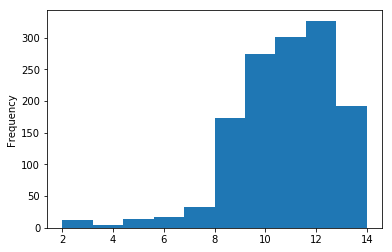

In [1353]:
twitter_archive_master[twitter_archive_master.rating_numerator<18]['rating_numerator'].plot(kind='hist')

选取去除异常值之后的数据作图，可以看到主人对狗狗的评分大多集中在10到12分之间。